In [1]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.2-cp36-none-any.whl size=7263 sha256=39f36b775eed8a22ca7d2914cbac3a985cdcd48284da0b48579ce225093f8502
  Stored in directory: /root/.cache/pip/wheels/4a/46/e1/605a71c70f6a19f16b44fc309f6557127591c69969476cf5d1
Successfully built minisom


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from minisom import MiniSom


In [8]:
import os

!git clone https://github.com/deeplearningunb/building-som.git

os.chdir('./building-som')
dataset = pd.read_csv('Credit_Card_Applications.csv')

Cloning into 'building-som'...
remote: Enumerating objects: 151, done.
remote: Counting objects: 100% (151/151), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 151 (delta 50), reused 124 (delta 30), pack-reused 0
Receiving objects: 100% (151/151), 3.37 MiB | 2.25 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [0]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [0]:
from minisom import MiniSom

som = MiniSom(x=15, y=15, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

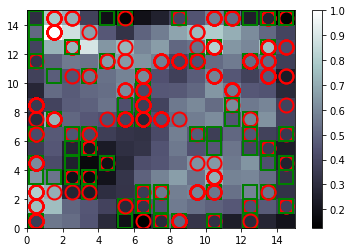

In [62]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g', 'b']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgewidth=2,
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=14,
    )
show()